# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

#City data list
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #Create endpoint URL with each city
    city_url = url + city
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | paamiut
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | rawson
Processing Record 7 of Set 1 | swan hill
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | faridpur
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | sur
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | avera
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | sumbawa
City not found. Skipping...
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set 1 

Processing Record 37 of Set 4 | meulaboh
Processing Record 38 of Set 4 | cockburn town
Processing Record 39 of Set 4 | santiago del estero
Processing Record 40 of Set 4 | guerrero negro
Processing Record 41 of Set 4 | fukuma
Processing Record 42 of Set 4 | batagay-alyta
Processing Record 43 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 44 of Set 4 | egvekinot
Processing Record 45 of Set 4 | adre
Processing Record 46 of Set 4 | morlaix
Processing Record 47 of Set 4 | arica
Processing Record 48 of Set 4 | zhanaozen
Processing Record 49 of Set 4 | nagato
Processing Record 0 of Set 5 | mazagao
Processing Record 1 of Set 5 | husavik
Processing Record 2 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 5 | saint-pierre
Processing Record 4 of Set 5 | akniste
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | ust-maya
Processing Record 7 of Set 5 | eyrarbakki
Processing Record 8 of Set 5 | uk
City not found. 

Processing Record 24 of Set 8 | verkhnevilyuysk
Processing Record 25 of Set 8 | idlib
Processing Record 26 of Set 8 | bonavista
Processing Record 27 of Set 8 | solnechnyy
Processing Record 28 of Set 8 | marcona
City not found. Skipping...
Processing Record 29 of Set 8 | mangaluru
Processing Record 30 of Set 8 | jaisalmer
Processing Record 31 of Set 8 | manggar
Processing Record 32 of Set 8 | gigmoto
Processing Record 33 of Set 8 | labuhan
Processing Record 34 of Set 8 | san carlos de bariloche
Processing Record 35 of Set 8 | airai
Processing Record 36 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 37 of Set 8 | tikapur
Processing Record 38 of Set 8 | camocim
Processing Record 39 of Set 8 | mecca
Processing Record 40 of Set 8 | lukiv
Processing Record 41 of Set 8 | tual
Processing Record 42 of Set 8 | halifax
Processing Record 43 of Set 8 | fortuna
Processing Record 44 of Set 8 | tuatapere
Processing Record 45 of Set 8 | tautira
Processing Record 46 of Set 8 | richard

Processing Record 12 of Set 12 | vestmanna
Processing Record 13 of Set 12 | inongo
Processing Record 14 of Set 12 | sept-iles
Processing Record 15 of Set 12 | daru
Processing Record 16 of Set 12 | montepuez
Processing Record 17 of Set 12 | ikwiriri
Processing Record 18 of Set 12 | machinga
Processing Record 19 of Set 12 | kamenka
Processing Record 20 of Set 12 | juba
Processing Record 21 of Set 12 | calvinia
Processing Record 22 of Set 12 | mitsamiouli
Processing Record 23 of Set 12 | kribi
Processing Record 24 of Set 12 | vyartsilya
Processing Record 25 of Set 12 | pemangkat
Processing Record 26 of Set 12 | villa bruzual
Processing Record 27 of Set 12 | kentau
Processing Record 28 of Set 12 | oksfjord
Processing Record 29 of Set 12 | tsumeb
Processing Record 30 of Set 12 | leirvik
Processing Record 31 of Set 12 | jinchang
Processing Record 32 of Set 12 | djambala
Processing Record 33 of Set 12 | tarakan
Processing Record 34 of Set 12 | samana
Processing Record 35 of Set 12 | zharkent


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lorengau,-2.0226,147.2712,28.92,75,67,1.96,PG,1683496361
1,hilo,19.7297,-155.0900,26.27,86,100,2.68,US,1683496293
2,paamiut,61.9940,-49.6678,1.18,84,98,2.07,GL,1683496169
3,leningradskiy,69.3833,178.4167,-5.02,80,98,0.41,RU,1683496182
4,new norfolk,-42.7826,147.0587,7.06,72,91,0.45,AU,1683496068


In [17]:
#Export city data to csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lorengau,-2.0226,147.2712,28.92,75,67,1.96,PG,1683496361
1,hilo,19.7297,-155.0900,26.27,86,100,2.68,US,1683496293
2,paamiut,61.9940,-49.6678,1.18,84,98,2.07,GL,1683496169
3,leningradskiy,69.3833,178.4167,-5.02,80,98,0.41,RU,1683496182
4,new norfolk,-42.7826,147.0587,7.06,72,91,0.45,AU,1683496068


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

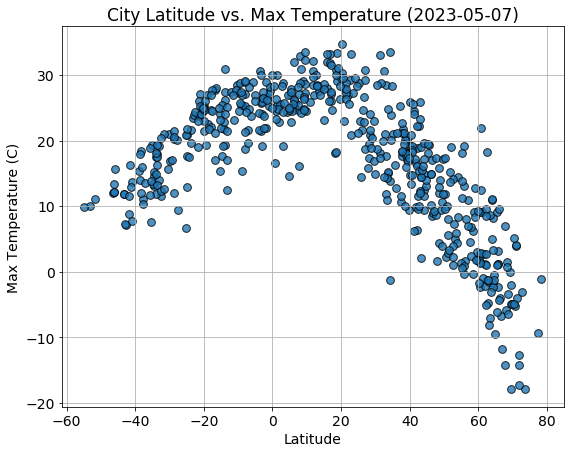

In [22]:
# Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties

x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=0.8,s=60)

#Date conversion
time_structure = time.localtime(city_data_df.iloc[0,8])
date = time.strftime("%Y-%m-%d", time_structure)
date

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Max Temperature (C)",size=14)
plt.title(f"City Latitude vs. Max Temperature ({date})",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

#### Latitude Vs. Humidity

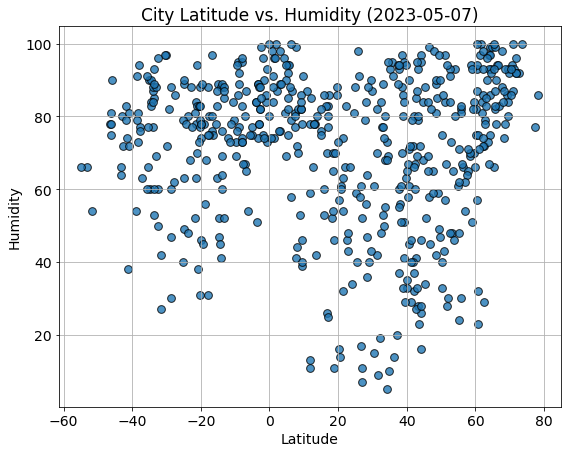

In [23]:
# Build the scatter plots for latitude vs. humidity

x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=0.8,s=60)

#Date conversion
time_structure = time.localtime(city_data_df.iloc[0,8])
date = time.strftime("%Y-%m-%d", time_structure)
date

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Humidity",size=14)
plt.title(f"City Latitude vs. Humidity ({date})",size=17)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

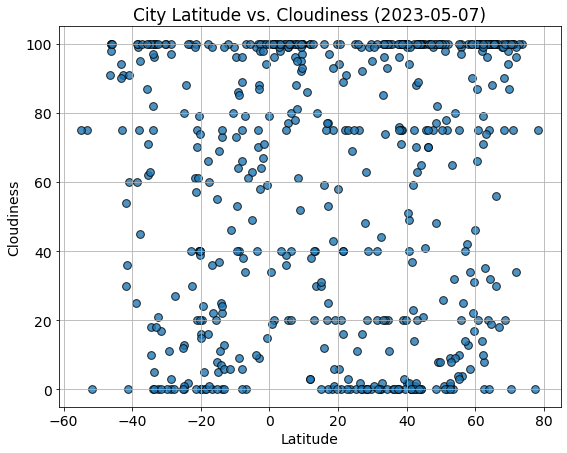

In [25]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=0.8,s=60)

#Date conversion
time_structure = time.localtime(city_data_df.iloc[0,8])
date = time.strftime("%Y-%m-%d", time_structure)
date

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Cloudiness",size=14)
plt.title(f"City Latitude vs. Cloudiness ({date})",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig3.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

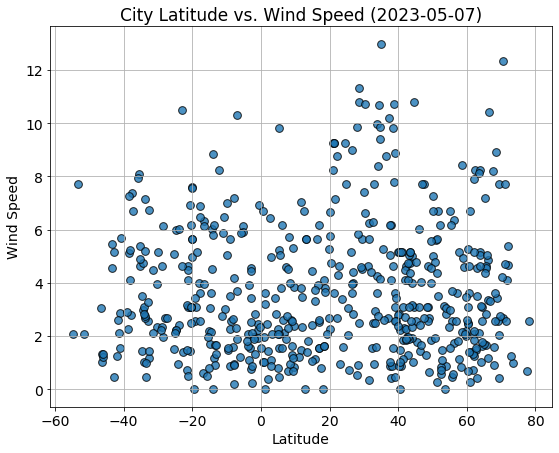

In [26]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=0.8,s=60)

#Date conversion
time_structure = time.localtime(city_data_df.iloc[0,8])
date = time.strftime("%Y-%m-%d", time_structure)
date

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Wind Speed",size=14)
plt.title(f"City Latitude vs. Wind Speed ({date})",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig4.png")

#Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
#Define a function to create Linear Regression plots
def lr(a,b,c,d,e,f):
    
    #Build scatter plot for chosen a,b
    plt.figure(figsize=(9,7))
    plt.scatter(a,b,s=60)

    #Incorporate the other graph properties
    plt.tick_params(axis='both',which='major',labelsize=14)
    plt.xlabel(c,size=14)
    plt.ylabel(d,size=14)
    
    #Regression
    (slope, intercept, r, p, stderr) = linregress(a,b)
    line = slope*a + intercept
    plt.plot(a,line,"r-")
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(e,f),color="red",size=22)
    print(f"The coefficient of determination is: {r**2}")
    
    #Show plot
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hilo,19.7297,-155.0900,26.27,86,100,2.68,US,1683496293
2,paamiut,61.9940,-49.6678,1.18,84,98,2.07,GL,1683496169
3,leningradskiy,69.3833,178.4167,-5.02,80,98,0.41,RU,1683496182
8,kapaa,22.0752,-159.3190,26.99,66,75,8.75,US,1683496364
10,faridpur,23.6000,89.8333,27.29,66,0,3.39,BD,1683496364


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lorengau,-2.0226,147.2712,28.92,75,67,1.96,PG,1683496361
4,new norfolk,-42.7826,147.0587,7.06,72,91,0.45,AU,1683496068
5,rawson,-43.3002,-65.1023,11.90,66,94,5.46,AR,1683496363
6,swan hill,-35.3378,143.5544,7.52,66,62,4.62,AU,1683496363
7,punta arenas,-53.1500,-70.9167,10.06,66,75,7.72,CL,1683496363


###  Temperature vs. Latitude Linear Regression Plot

The coefficient of determination is: 0.7244849055545739


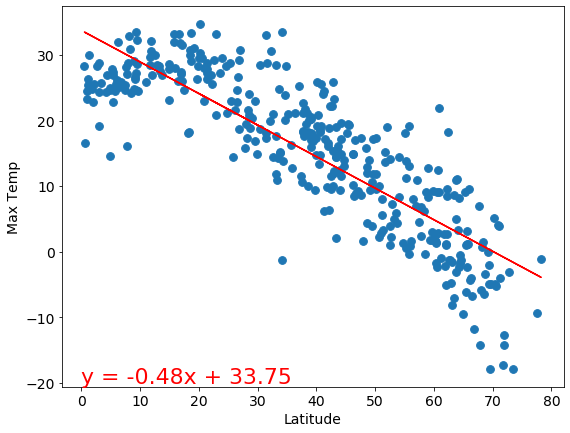

In [51]:
# Linear regression on Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = 0
f = -20
lr(a,b,c,d,e,f)

The coefficient of determination is: 0.617575900344725


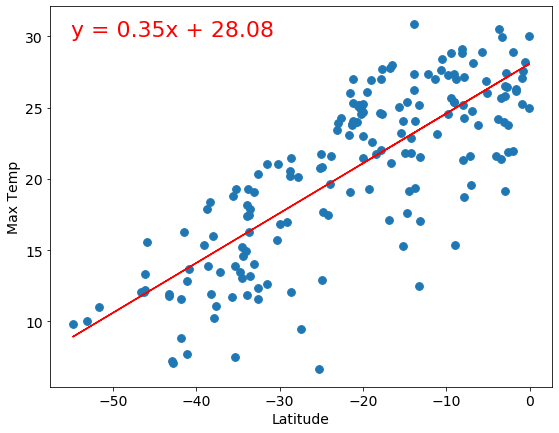

In [48]:
# Linear regression on Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = -55
f = 30
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** 
* The plot for latitude vs. max temperature in the northern hemisphere has a coefficient of determination 0.7 which is close to 1. This means that the regression model is fairly accurate at predicting the dependent variable (Max Temp) when given the independent variable (Latitude). As the latitude increases the Max Temp decreases.
* The plot for latitude vs. max temperature in the northern hemisphere has coefficient of determination 0.6. This means as latitude increases the max temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The coefficient of determination is: 0.018721456795770693


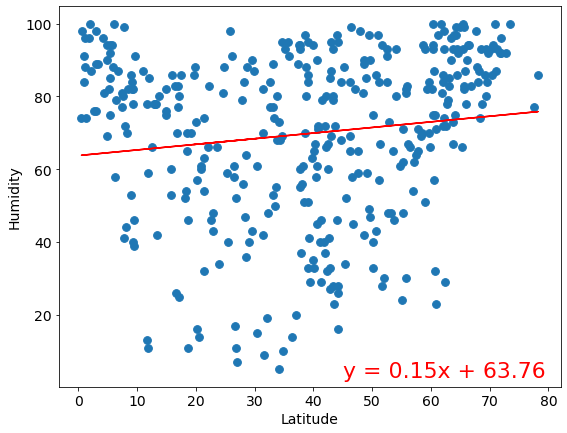

In [62]:
# Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = 45
f = 3
lr(a,b,c,d,e,f)

The coefficient of determination is: 0.026961355681878973


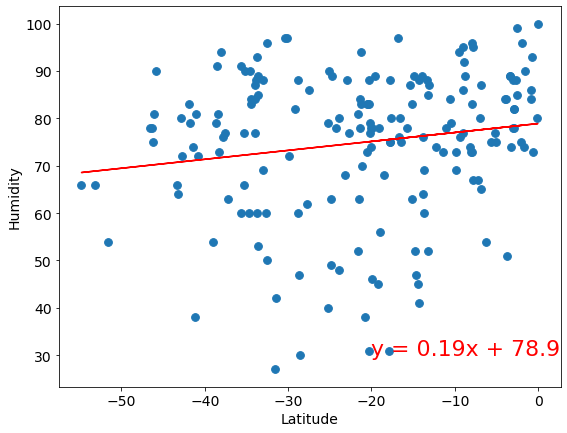

In [88]:
# Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = -20
f = 30
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** 
The coefficients of determination for both "Humidity vs. Latitude" plots are close to zero. This means that the regression model is not accurate at predicting Humidity when given the Latitude. The scatter plot points look completely unrelated to the regression line. According to this data, the linear relationship between Humidty and Latitude is weak.

### Cloudiness vs. Latitude Linear Regression Plot

The coefficient of determination is: 0.0013344871962850948


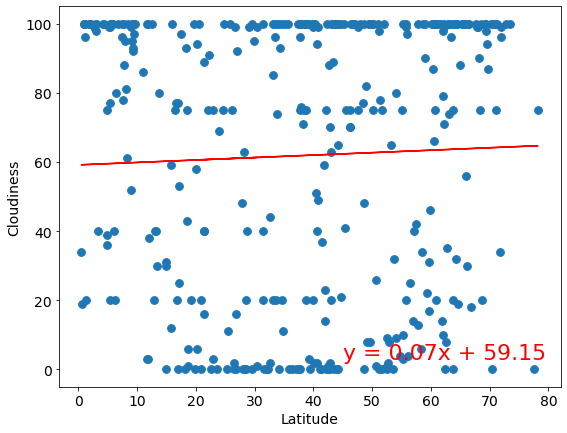

In [89]:
# Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = 45
f = 3
lr(a,b,c,d,e,f)

The coefficient of determination is: 0.001700516121760215


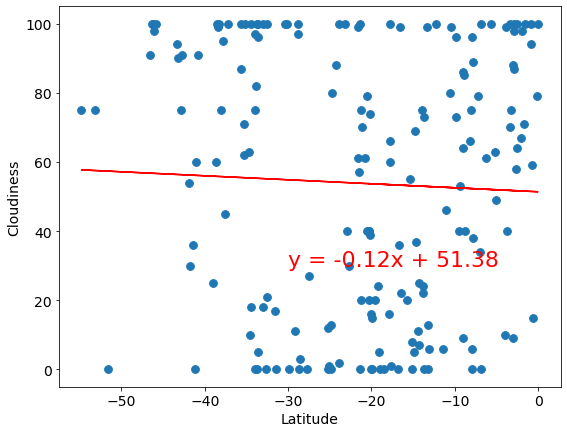

In [92]:
# Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = -30
f = 30
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** 
The coefficients of determination for both "Humidity vs. Cloudiness" plots are close to zero. This means that the regression model is not accurate at predicting Cloudiness when given the Latitude. The scatter plot points look completely unrelated to the regression line. According to this data, the linear relationship between Cloudiness and Latitude is weak

### Wind Speed vs. Latitude Linear Regression Plot

The coefficient of determination is: 0.0003243647421035275


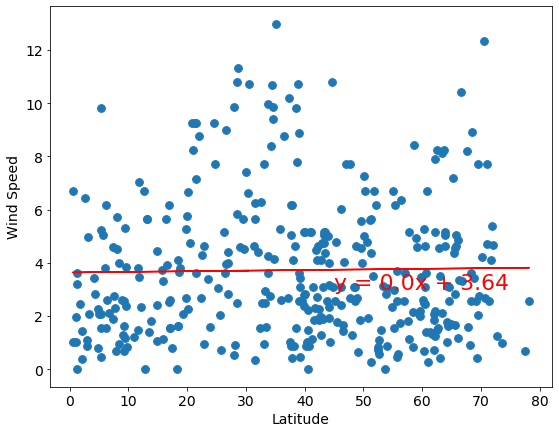

In [93]:
# Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = 45
f = 3
lr(a,b,c,d,e,f)

The coefficient of determination is: 0.007049248304087337


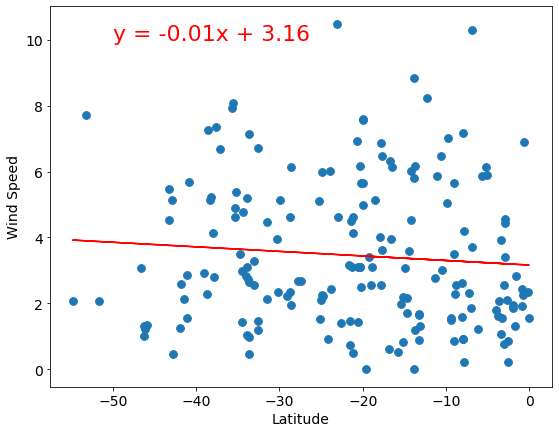

In [100]:
# Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = -50
f = 10
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** 
These plots show a weak linear relationship between Latitude and Wind speed. The coefficients of determination for the Wind Speed vs. Latitude plots are close to zero. According to this data, the linear relationship between Wind Speed and Latitude is weak for both Noerthern and southern hemisphere.